<a href="https://colab.research.google.com/github/r-chaudhary/Artificial-Intelligent-Repo/blob/master/WaterJug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Jug Problem


---



Water pouring puzzles (also called water jug problems, decanting problems or measuring puzzles) are a class of puzzle involving a finite collection of water jugs of known integer capacities (in terms of a liquid measure such as liters or gallons). Initially each jug contains a known integer volume of liquid, not necessarily equal to its capacity. Puzzles of this type ask how many steps of pouring water from one jug to another (until either one jug becomes empty or the other becomes full) are needed to reach a goal state, specified in terms of the volume of liquid that must be present in some jug or jugs.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Water_pouring_puzzle)



---




## **Rules**

---


> Either one jug becomes empty or the other becomes full



## Program

In [203]:
from graphviz import Digraph
import copy

In [204]:
# Jug Object
class Jug:
    def __init__(self, name, max_limit, initial_water = 0):
        self.name= name
        self.water = initial_water
        self.max_limit = max_limit

    def __str__(self):
        return self.name


In [205]:
# State object stores the jug state after the valid transfers
class State:
    def __init__(self, name, parent, jug_state):
        self.name = name
        self.parent = parent
        self.jug_state = jug_state
        self.child = []


In [206]:
class WaterJug:
    def __init__(self, ):
        self.Jugs = {}
        self.states = {}

    def create_jug(self, name, max_limit, initial_water):
        self.Jugs[name] = Jug(name, max_limit, initial_water)

    def generate_name(self, jugs):
        # This methods make the name of a state by the status of water in jug
        water = ""
        for i in jugs.values():
            water += str(i.water)+","

        return water[:-1]

    def calculate(self):
        # This method does water jug calculation
        # It functions Depth First Search and descover all the possible state of Jug.

        # Discovered List
        discovered = []
        # Queue List
        queue = []

        name = self.generate_name(self.Jugs)
        self.states[name] = State(name, None, self.Jugs)
        queue.append(name)

        while queue:
            current_state = queue.pop()

            if current_state in discovered:
                continue
            else:
                discovered.append(current_state)
                
            for main_jug in self.states[current_state].jug_state:
                for other_jug in self.states[current_state].jug_state:
                    if main_jug == other_jug:
                        continue

                    # Storing some values for easy working
                    main_water = self.states[current_state].jug_state[main_jug].water
                    other_water = self.states[current_state].jug_state[other_jug].water
                    main_max_limit = self.states[current_state].jug_state[main_jug].max_limit
                    other_max_limit = self.states[current_state].jug_state[other_jug].max_limit

                    # If the jug is empty so we should leave it
                    if main_water ==  0:
                        continue

                    # Calculating free space in other jug
                    other_free =  other_max_limit - other_water

                    if main_water >= other_free and other_free > 0:
                        # Here the main jug has enough water to fill the other completly

                        # Copying jug object and updating its state
                        new_jug = copy.deepcopy(self.states[current_state].jug_state)
                        new_jug[main_jug].water =  main_water - other_free
                        new_jug[other_jug].water = other_free + other_water

                        name = self.generate_name(new_jug)
                        # If the new state is already discovered then skip
                        if name in discovered:
                            continue
                        else:
                            self.states[name] = State(name, current_state, new_jug)
                            self.states[current_state].child.append(name)
                            queue.append(name)

                    elif main_water <= other_free and other_free > 0:
                        # Here the main jug has very less water that it cann
                        # transfer it to other jugand become empty

                        new_jug = copy.deepcopy(self.states[current_state].jug_state)
                        
                        new_jug[main_jug].water =  0
                        new_jug[other_jug].water = main_water + other_water
                        name = self.generate_name(new_jug)
                        if name in discovered:
                            continue
                        else:
                            self.states[name] = State(name, current_state, new_jug)
                            self.states[current_state].child.append(name)
                            queue.append(name)

    def draw_graph(self):
        # This method visualize the all states of jug

        styles = {
            'node': {'shape': 'circle', 'style': 'filled', 'color': 'blue'},
        }

        G = Digraph()
        for i in self.states:
            G.node(i, i, styles['node'])
            for j in self.states[i].child:
                G.edge(i,j)
        return G

                                                        

## Output

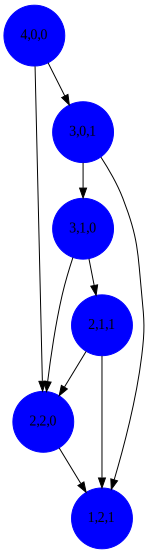

In [207]:
wj = WaterJug()
wj.create_jug("J1", 4, 4)
wj.create_jug("J2", 2, 0)
wj.create_jug("J3", 1, 0)
wj.calculate()
wj.draw_graph()